
* Import required libraries for computation, and visualisation


* 'random' calls a pseudo-random number generator; https://cplusplus.com/reference/random/mt19937/

* 'rand' from 'random' library gives array of random numbers [0,1) in required shape

* 'randn' from 'random' library gives also give random numbers based on gaussian distribution (unlike 'uniform' in 'rand')

* generate data y=f(x) with




Useful info: type << ___ ?>> after some function to pop-up help menu written in source,only for widely used functions. Eg. np.random.rand?



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
m =100
X = 2*np.random.rand(m,1)
y = 4+3*X+np.random.randn(m,1)   #Construct a linearly related X,y data

In [ ]:
from sklearn.preprocessing import add_dummy_feature

* Add a dummy feature (x0 = 1) to each instance in X

* .T is transpose

* @ is for matrix multiplication
* calculate weights


In [ ]:
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
wts_reg = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [ ]:
>>> wts_reg

array([[4.21509616],
       [2.77011339]])

Use above weights to predict for selected values ( in given range) and plot

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_p = X_new_b @ wts_reg
y_p

array([[4.21509616],
       [9.75532293]])

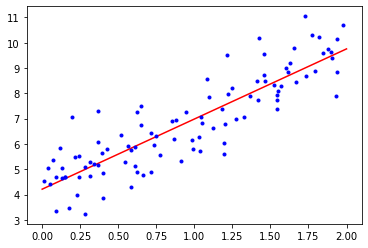

In [ ]:
plt.plot(X_new, y_p, "r-",label="predictions")

plt.plot(X,y,"b.")
plt.show()

Perform linear regression using libraries from scikit-learn

Check if the results are similar

In [ ]:
#Performing lin. reg. from scikit-Learn is straightforward
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.21509616] [[2.77011339]]
[[4.21509616]
 [9.75532293]]


In [ ]:
#Computational Complexity --> matrix inversion O(n^3)

### Polynomial Regression

* generate data randomly spread over arbitrary polynomial

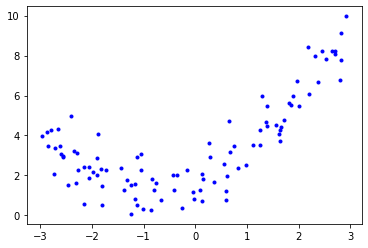

In [ ]:
np.random.seed(42)
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)
plt.plot(X,y,"b.")

* Using library from scikit for poly-regression
* degree means maximal degree of polynomial feature ; one can also give minimal value by (a-min,b-max) used for pol-features
* include_bias is used to include coefficient but zeroth power or constant/bias
* Transform X to include polynomial features

In [ ]:
#Use Scikit-Learn's PolynomialFeatures Class
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [ ]:
#above contains original feature of X plus the square of the feature
# Now fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

In [ ]:
print(lin_reg.intercept_,lin_reg.coef_)

[1.78134581] [[0.93366893 0.56456263]]


Compute learning curves using the learning_curve function. Compute mean training and validation errors by taking the negative mean of the train_scores and valid_scores along the rows (axis=1).

Parameters:
* estimator: The learning algorithm to use (in this case, LinearRegression()).
* X: The feature matrix.
* y: The target variable.
* train_sizes: An array of training set sizes to use for learning curves. Here, we use np.linspace(0.01, 1.0, 40) to generate 40 evenly spaced training set sizes ranging from 1% to 100% of the total data size.
* cv: The number of cross-validation folds.
* scoring: The evaluation metric used for scoring. Here, we use "neg_root_mean_squared_error" to compute the negative root mean squared error.

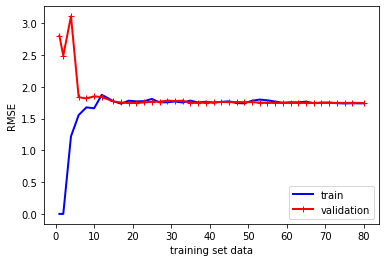

In [ ]:
#learning curves
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),X,y,train_sizes=np.linspace(0.01,1.0,40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot (train_sizes, train_errors, "b-", linewidth=2, label="train")
plt.plot (train_sizes, valid_errors, "r-+", linewidth=2, label="valid")
plt.xlabel("training set data")
plt.ylabel("RMSE")
plt.legend(["train", "validation"], loc="lower right")
plt.show()

#Notice that it's a linear fit and therefore underfiting the data
#notice that RMSE is not small enough

Create a pipeline for polynomial regression using make_pipeline. A pipeline allows you to chain multiple estimators (transformers and predictors) into a single object, simplifying the workflow and ensuring consistency in parameter tuning and data preprocessing.
The pipeline here consists of two steps:
* PolynomialFeatures: Transforms the features into polynomial features of degree 2 without including bias terms.
* LinearRegression: Fits a linear regression model to the polynomial features.


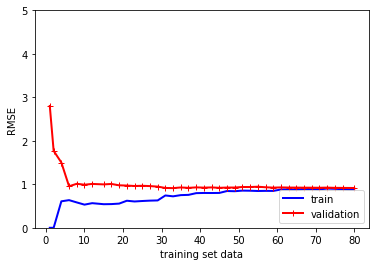

In [ ]:
from sklearn.pipeline import make_pipeline
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X,y,train_sizes=np.linspace(0.01,1.0,40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot (train_sizes, train_errors, "b-", linewidth=2, label="train")
plt.plot (train_sizes, valid_errors, "r-+", linewidth=2, label="valid")
plt.ylim(0,5)
plt.xlabel("training set data")
plt.ylabel("RMSE")
plt.legend(["train", "validation"], loc="lower right")
plt.show()